In [18]:
from sklearn.datasets import make_circles, make_blobs, make_moons
import numpy as np
import matplotlib.pyplot as plt

In [19]:
n_samples = 1500
circles = make_circles(n_samples = n_samples, noise = 0.05, factor = 0.5)
moons = make_moons(n_samples = n_samples, noise = 0.05)
blobs = make_blobs(n_samples = n_samples)
no_structure = np.random.rand(n_samples, 2), None

In [20]:
clustering_names = ["MiniBatchKMeans", "SpectralClustering", "Ward", "AgglomerativeClustering", "DBSCAN", "Birch"]
colors = np.array(["b", "g", "r", "c", "m", "y"])
datasets = [circles, moons, blobs, no_structure]

In [21]:
from sklearn.cluster import MiniBatchKMeans, SpectralClustering, AgglomerativeClustering, DBSCAN, Birch
from sklearn.preprocessing import StandardScaler

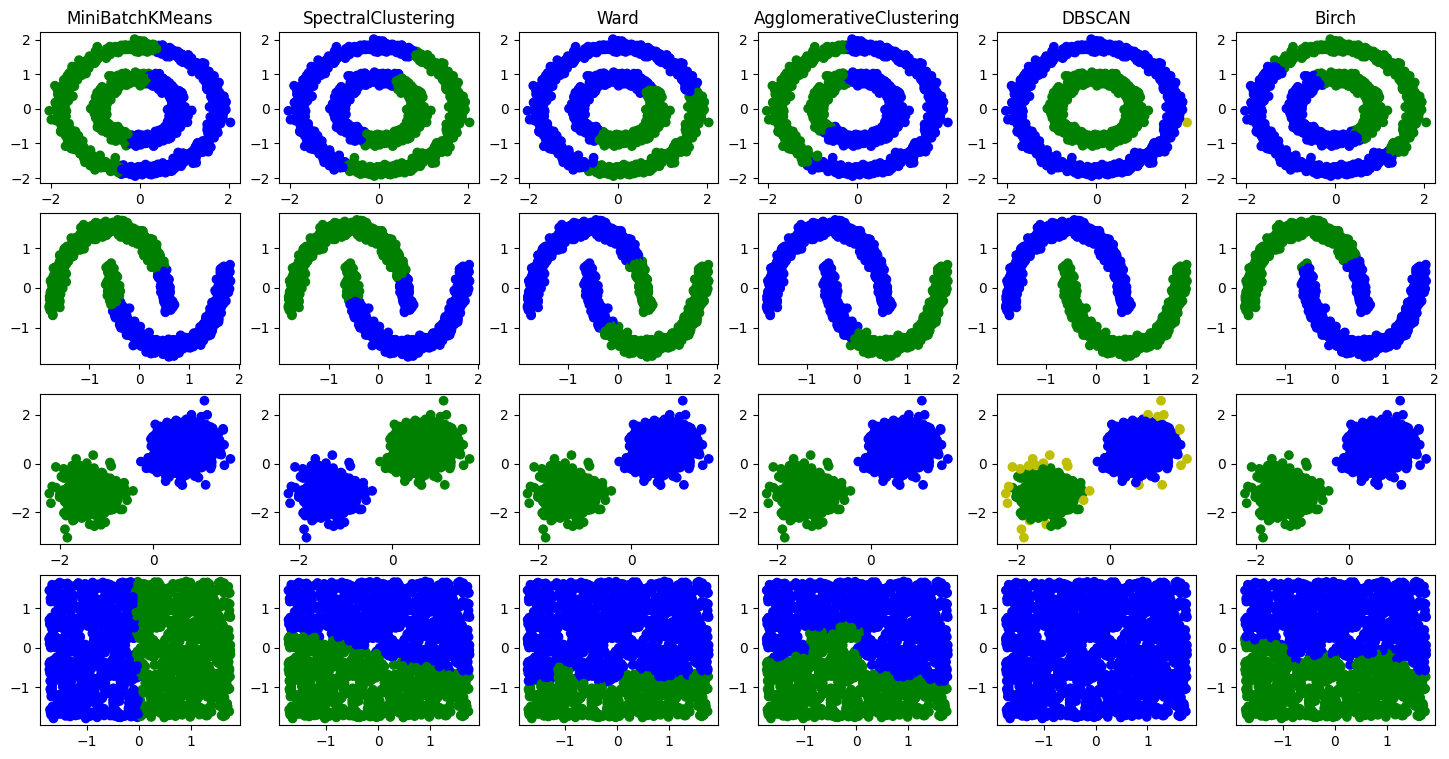

In [22]:
plt.figure(figsize = (18, 9))
i = 1
for cnt, dataset in enumerate(datasets):
  plt.subplot(4, 6, i)
  X, y = dataset
  X = StandardScaler().fit_transform(X)

  mini_batch = MiniBatchKMeans(n_clusters = 2)
  spectral = SpectralClustering(n_clusters = 2)
  ward = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
  average = AgglomerativeClustering(n_clusters = 2, linkage = "average")
  dbscan = DBSCAN(eps = 0.2)
  birch = Birch(n_clusters = 2)

  clustering_algorithms = [mini_batch, spectral, ward, average, dbscan, birch]

  for name, algorithm in zip(clustering_names, clustering_algorithms):
    algorithm.fit(X)
    if hasattr(algorithm, "labels_"):
      y_pred = algorithm.labels_.astype(int)
    else:
      y_pred = algorithm.predict(X)

    plt.subplot(len(datasets), len(clustering_algorithms), i)
    if cnt == 0:
      plt.title(name)
    plt.scatter(X[:,0], X[:,1], color = colors[y_pred].tolist())
    i += 1